# Feature Selection

In [2]:
# Remove Unused Columns
# Drop Columns with missing values
# Identify UNCORRELATED features (num & cat)
# Low Variance Features
# Multicollinearity
# Feature Coefficients
# p-value
# VIF - Variance Inflation Factor
# Feature Importance
# Chi-squared
# Regularization
# PCA

In [3]:
import pandas as pd
data = 'https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/automobile.csv'
df = pd.read_csv(data)
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
30,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.2,76,6000,31,38,6855
47,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
28,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.6,3.9,7.0,145,5000,19,24,12964
69,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.1,8.3,155,4750,16,18,35056
117,1,154.0,plymouth,gas,std,four,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229


In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
# Remove unused columns

In [7]:
# Drop columns with significant missing values
# total null values per column
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

<AxesSubplot:>

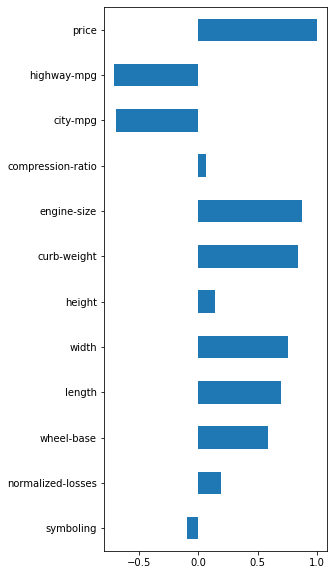

In [8]:
# Uncorrelated Features to the TARGET
# correlation between target and features (Numeric only)
(df.corr().loc['price']
 .plot(kind='barh', figsize=(4,10)))

In [9]:
# drop uncorrelated numeric features (threshold <0.2)
corr = abs(df.corr().loc['price'])
corr = corr[corr<0.2]
cols_to_drop = corr.index.to_list()
df = df.drop(cols_to_drop, axis=1)

<AxesSubplot:xlabel='fuel-type', ylabel='price'>

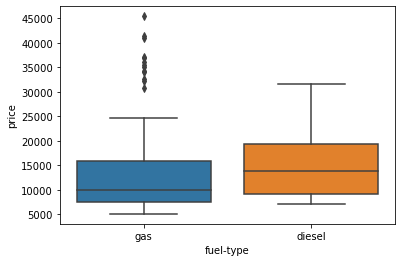

In [10]:
# Same for Categorical
import seaborn as sns
sns.boxplot(y = 'price', x = 'fuel-type', data=df)

In [11]:
# Low Variance Features
import numpy as np
# variance of numeric features
(df
 .select_dtypes(include=np.number)
 .var()
 .astype('str'))

wheel-base      37.14320501453129
length         152.13569971922544
width          4.4390887148416365
curb-weight      267533.755898724
engine-size    1718.5393084084524
city-mpg        41.24151519629575
highway-mpg     46.37527707994674
price           63280745.69962066
dtype: object

In [13]:
df['width'].describe()

count    202.000000
mean      65.903960
std        2.106915
min       60.300000
25%       64.125000
50%       65.500000
75%       66.825000
max       72.000000
Name: width, dtype: float64

In [14]:
# Multicollinearity
df.corr()

,wheel-base,length,width,curb-weight,engine-size,city-mpg,highway-mpg,price
wheel-base,1.000000,0.876689,0.816586,0.782893,0.570654,-0.474246,-0.545504,0.588382
length,0.876689,1.000000,0.858237,0.881257,0.684445,-0.666999,-0.699408,0.692774
width,0.816586,0.858237,1.000000,0.866690,0.727941,-0.635681,-0.681924,0.753236
curb-weight,0.782893,0.881257,0.866690,1.000000,0.848463,-0.750710,-0.795678,0.835277
engine-size,0.570654,0.684445,0.727941,0.848463,1.000000,-0.650490,-0.679611,0.871051
city-mpg,-0.474246,-0.666999,-0.635681,-0.750710,-0.650490,1.000000,0.972116,-0.688254
highway-mpg,-0.545504,-0.699408,-0.681924,-0.795678,-0.679611,0.972116,1.000000,-0.705924
price,0.588382,0.692774,0.753236,0.835277,0.871051,-0.688254,-0.705924,1.000000


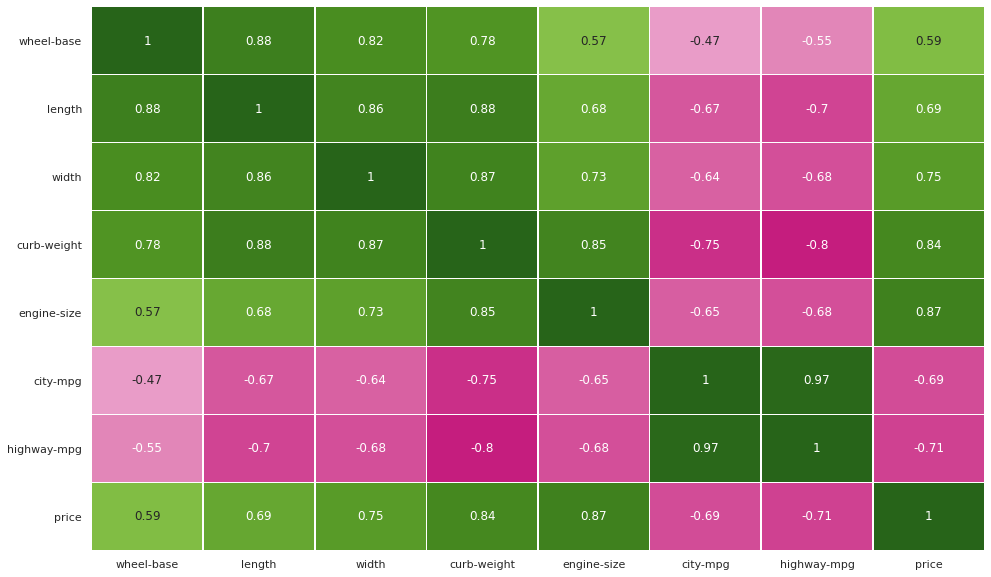

In [15]:
# Multicollinearity with numeric features (Heatmap)
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.show()

In [16]:
# drop correlated features - ONLY drop ONE of the correlated features
df = df.drop(['length', 'width', 'curb-weight', 'city-mpg'], axis=1)

In [17]:
# Same with cat
df_cat = df[['fuel-type', 'body-style']]
df_cat.sample(5)

,fuel-type,body-style
44,gas,sedan
126,gas,wagon
22,gas,hatchback
62,gas,sedan
135,gas,hatchback


In [18]:
# next create a crosstab
crosstab = pd.crosstab(df_cat['fuel-type'], df_cat['body-style'])
crosstab

body-style,convertible,hardtop,hatchback,sedan,wagon
fuel-type,,,,,
diesel,0,1,1,15,3
gas,6,7,67,80,22


In [19]:
from scipy.stats import chi2_contingency
chi2_contingency(crosstab)
# output is:  chi-squared value, p-value (p<0.05 means we can reject the null hypothesis... i.e.:  p<.05 means there is NOT relationship between the features... in other words in our case... - there IS a statistically significant relationship), degree of freedom, array of expected frequencies

(9.953585564590208,
 0.04121682705941806,
 4,
 array([[ 0.59405941,  0.79207921,  6.73267327,  9.40594059,  2.47524752],
        [ 5.40594059,  7.20792079, 61.26732673, 85.59405941, 22.52475248]]))

In [20]:
# Feature Selection AFTER a model has seen the data

In [21]:
data = 'https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/automobile.csv'
df = pd.read_csv(data)

In [22]:
# drop columns with missing values
df = df.dropna()
from sklearn.model_selection import train_test_split
# get dummies for categorical features
df = pd.get_dummies(df, drop_first=True)
# X features
X = df.drop('price', axis=1)
# y target
y = df['price']
# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# convert back to dataframe
X_train = pd.DataFrame(X_train, columns = X.columns.to_list())
X_test = pd.DataFrame(X_test, columns = X.columns.to_list())
# instantiate model
model = LinearRegression()
# fit
model.fit(X_train, y_train)

LinearRegression()

In [23]:
X_train.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,...,peak-rpm_5100,peak-rpm_5200,peak-rpm_5250,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5600,peak-rpm_5800,peak-rpm_6000,peak-rpm_6600
0,1.832878,0.785024,0.182415,1.320020,0.491609,1.023124,0.538567,0.149068,-0.243561,-0.833258,...,-0.133631,-0.404061,5.244044,-0.094072,-0.214176,-0.475191,-0.094072,-0.190693,-0.255774,-0.133631
1,0.200471,-0.098310,-0.886041,-1.340892,-0.935912,-1.325552,-1.198010,-0.824694,-0.216981,1.662412,...,-0.133631,-0.404061,-0.190693,-0.094072,-0.214176,2.104417,-0.094072,-0.190693,-0.255774,-0.133631
2,0.200471,0.177732,-0.727751,-0.614363,-0.935912,0.314090,-1.110241,-0.604812,-0.219397,0.726535,...,-0.133631,2.474874,-0.190693,-0.094072,-0.214176,-0.475191,-0.094072,-0.190693,-0.255774,-0.133631
3,-0.615733,1.088670,1.923603,1.329102,1.496161,1.289011,1.677478,1.122829,2.583532,0.258597,...,-0.133631,-0.404061,-0.190693,-0.094072,-0.214176,-0.475191,-0.094072,-0.190693,-0.255774,-0.133631
4,-0.615733,1.833983,0.597926,0.430022,-0.407201,0.225460,0.544837,1.499768,-0.316050,-0.833258,...,-0.133631,-0.404061,-0.190693,-0.094072,-0.214176,-0.475191,-0.094072,-0.190693,-0.255774,-0.133631


<AxesSubplot:>

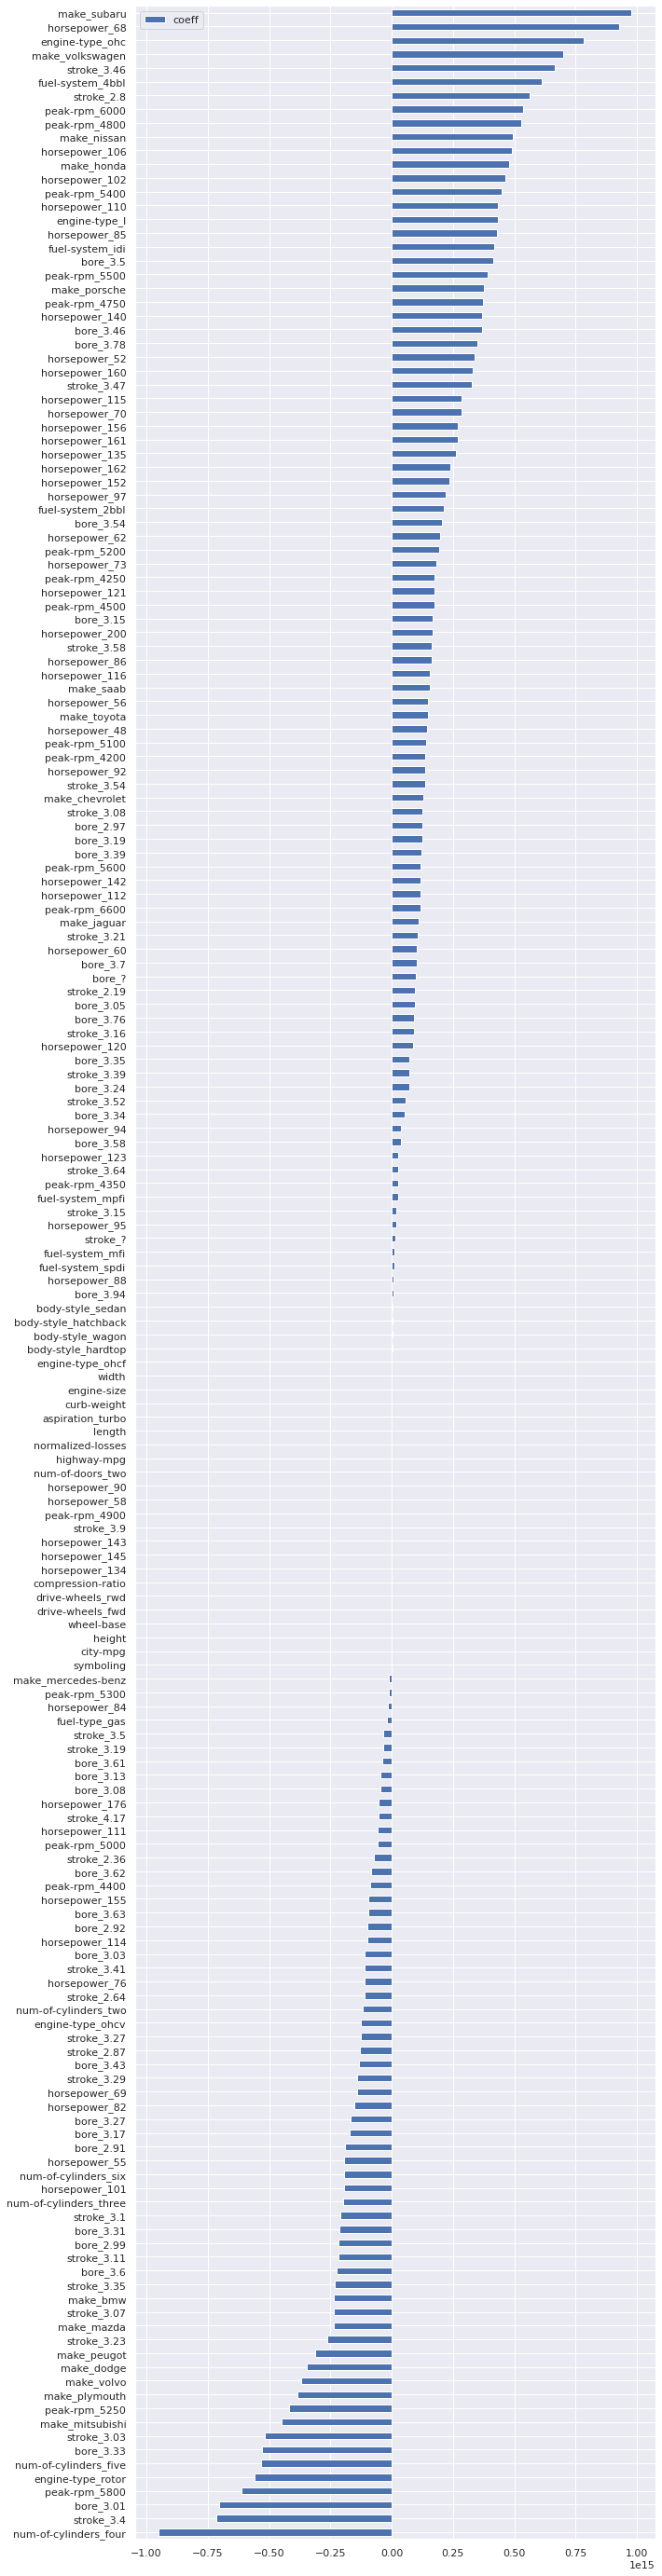

In [26]:
# feature coefficients
coeffs = model.coef_
# visualizing coefficients
index = X_train.columns.tolist()
(pd.DataFrame(coeffs, index = index, columns = ['coeff']).sort_values(by = 'coeff')
 .plot(kind='barh', figsize=(10,50)))

In [27]:
# p-value
import statsmodels.api as sm
ols = sm.OLS(y, X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     50.02
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           1.38e-43
Time:                        15:13:16   Log-Likelihood:                -1315.9
No. Observations:                 164   AIC:                             2814.
Df Residuals:                      73   BIC:                             3096.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
symboling                -77

In [28]:
# Variance Inflation Factor
# VIF = 1 means NO correlation
# VIF = 1.1=5 means MODERATE correlation &
# VIF = > 5 high correlation
# another test for multicollinearity AFTER the model has seen the data
# definitely remove high correlation... subjective wrt removing moderate correlation

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# calculate VIF
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
# display VIFs in a table
index = X_train.columns.tolist()
vif_df = pd.DataFrame(vif, index = index, columns = ['vif']).sort_values(by = 'vif', ascending=False)
vif_df[vif_df['vif']<10]

/opt/conda/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif
body-style_hardtop,7.566386
num-of-doors_two,6.456397


In [30]:
# Feature Importance
from sklearn.ensemble import RandomForestClassifier
# instantiate model
model = RandomForestClassifier(n_estimators=200, random_state=0)
# fit model
model.fit(X,y)

RandomForestClassifier(n_estimators=200, random_state=0)

<AxesSubplot:>

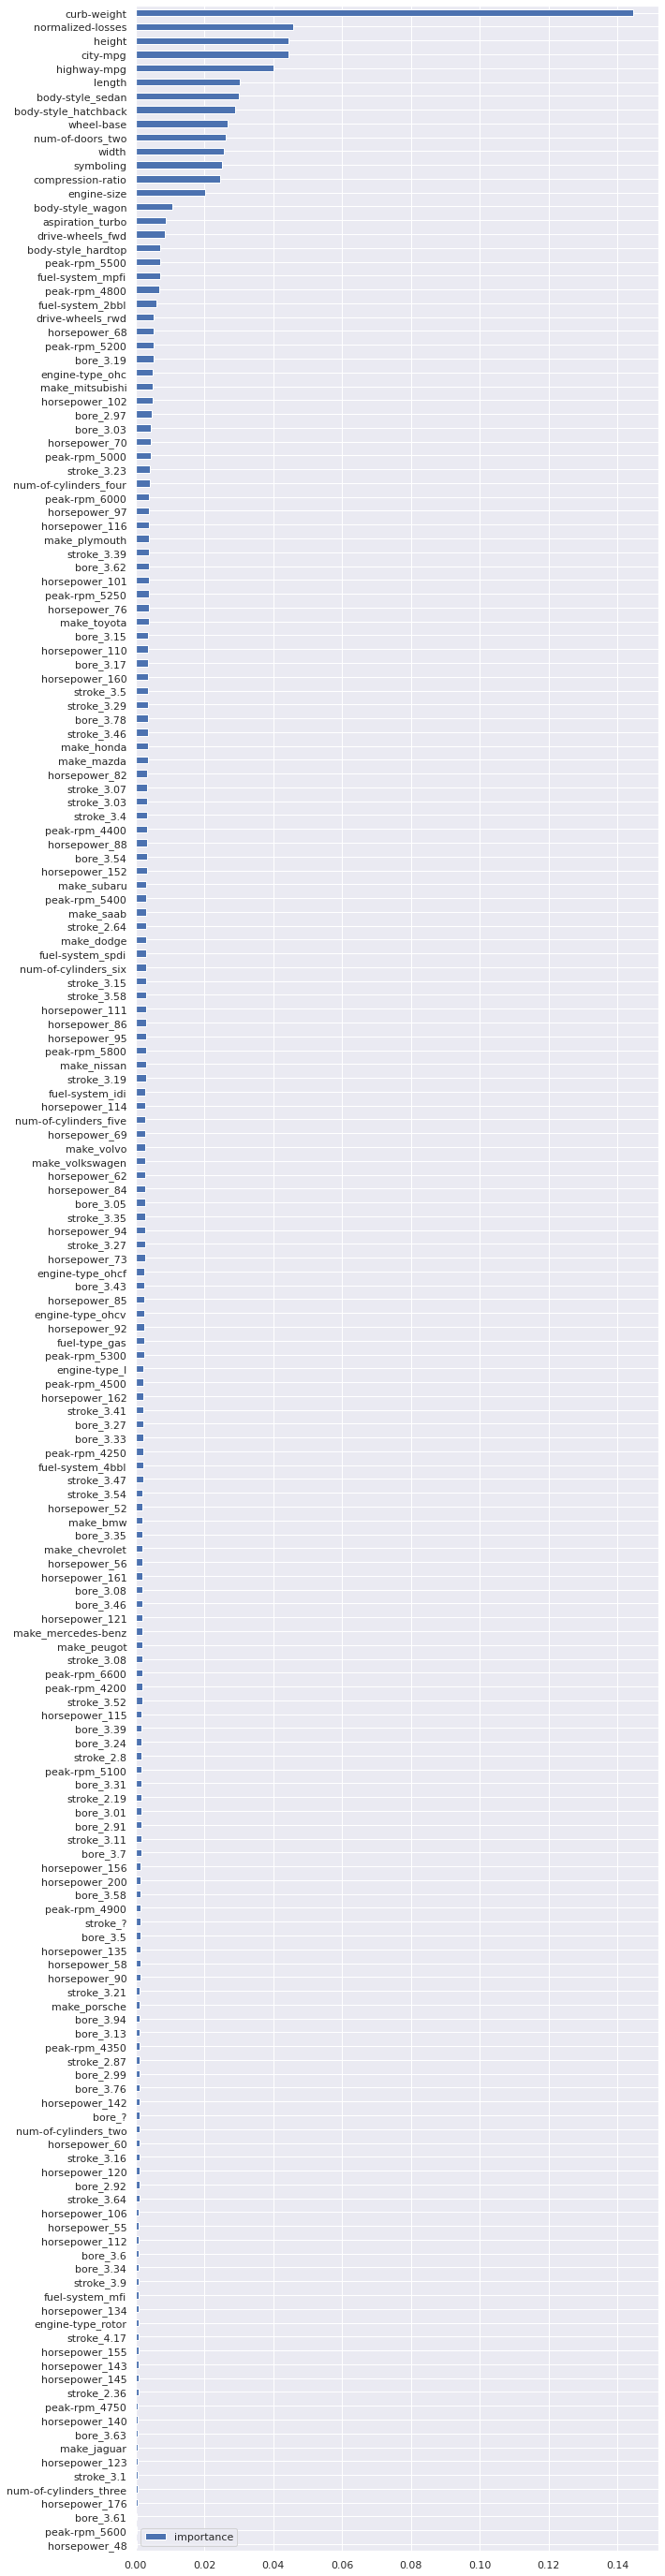

In [32]:
#  feature importance
importances = model.feature_importances_
# visualization
cols = X.columns
(pd.DataFrame(importances, cols, columns = ['importance'])
 .sort_values(by='importance', ascending=True)
 .plot(kind='barh', figsize=(10,50)))

Text(0, 0.5, 'Mean decrease in impurity')

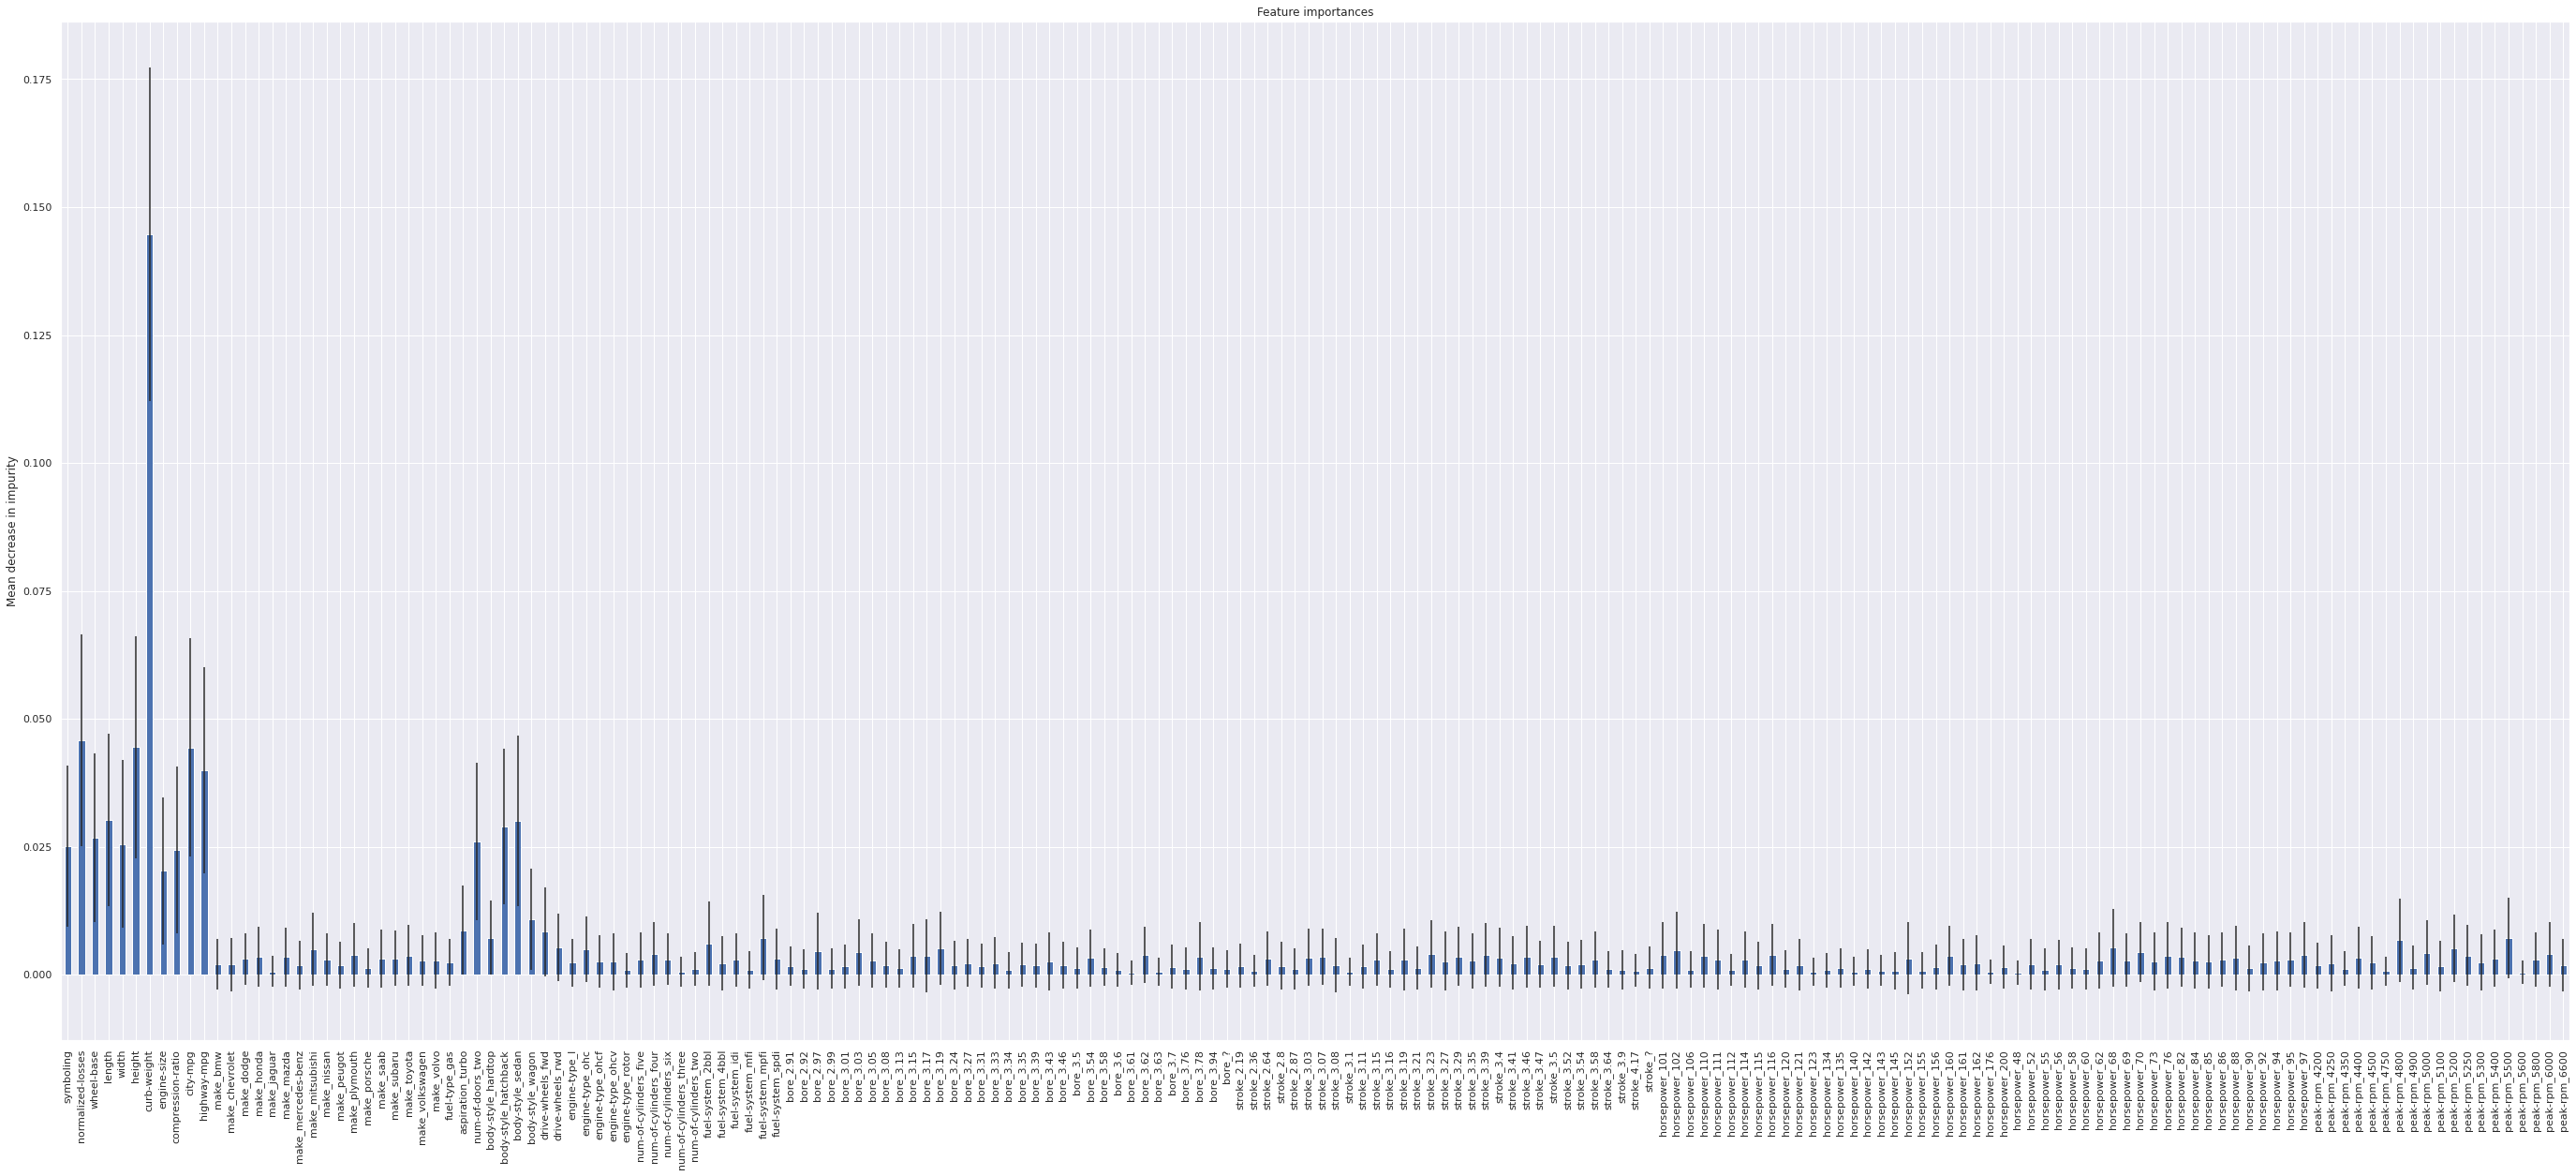

In [35]:
# calculate standard deviation of feature importances 
std = np.std([i.feature_importances_ for i in model.estimators_], axis=0)
# visualization
feat_with_importance  = pd.Series(importances, X.columns)
fig, ax = plt.subplots(figsize=(48,20))
feat_with_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")

Text(0, 0.5, 'Cumulative explained variance')

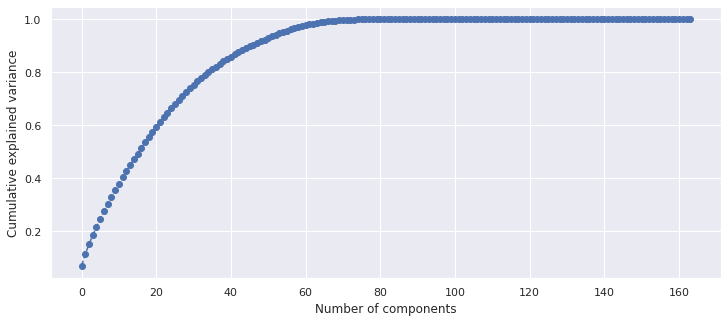

In [36]:
# PCA
# import PCA module
from sklearn.decomposition import PCA
# scaling data
X_scaled = scaler.fit_transform(X)
# fit PCA to data
pca = PCA()
pca.fit(X_scaled)
evr = pca.explained_variance_ratio_
# visualizing the variance explained by each principal components
plt.figure(figsize=(12, 5))
plt.plot(range(0, len(evr)), evr.cumsum(), marker="o", linestyle="--")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [37]:
# Automated Tooling
# DataPrep
# Skimpy
# Sweetviz
# Pandas Profiling

#Installing the library
!pip install dataprep
#Importing 
from dataprep.eda import create_report
#Creating report
create_report(df)

     |████████████████████████████████| 9.9 MB 9.4 MB/s eta 0:00:01     |██                              | 614 kB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 28.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 31.3 MB/s eta 0:00:01
     |████████████████████████████████| 458 kB 37.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 24.1 MB/s eta 0:00:01
     |████████████████████████████████| 101 kB 23.5 MB/s ta 0:00:01
     |████████████████████████████████| 1.3 MB 21.1 MB/s eta 0:00:01
     |████████████████████████████████| 12.8 MB 26.9 MB/s eta 0:00:01
     |████████████████████████████████| 17.1 MB 27.9 MB/s eta 0:00:01
     |████████████████████████████████| 764 kB 37.1 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 36.1 MB/s eta 0:00:01
     |████████████████████████████████| 943 kB 26.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 25.7 MB/s eta 0:00:01
     |██████████████████████████████

ImportError: cannot import name 'ParameterSource' from 'click.core' (/opt/conda/lib/python3.8/site-packages/click/core.py)

In [38]:
!pip install pandas-profiling

     |████████████████████████████████| 262 kB 16.8 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 30.2 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 32.4 MB/s ta 0:00:01
     |████████████████████████████████| 4.7 MB 34.4 MB/s eta 0:00:01
     |████████████████████████████████| 696 kB 29.6 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 27.7 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27084 sha256=8a97027f0198f80330583ee724140eb9f44ba596f59dafd1693550e61701c750
  Stored in directory: /tmp/pip-ephem-wheel-cache-xw55k9f1/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295199 sha256=7b21672e2c2108bed204fda6dd5cfbcfe5e34bc505bde10ca4a8574f089f2d16
  Stored in directory: /tmp/pip-ephem-wheel-cache-xw55k9f1/wheels/48/a1/7f/096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built ht

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/fenago/compas-analysis/master/compas-scores.csv')


In [41]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")

Pandas backend loaded 1.1.4
Numpy backend loaded 1.18.5
Pyspark backend NOT loaded
Python backend loaded


In [42]:
profile.to_widgets()

/opt/conda/lib/python3.8/site-packages/pandas_profiling/model/correlations.py:120: RuntimeWarning: invalid value encountered in greater_equal
  bool_index = abs(correlation_matrix.values) >= threshold


KeyboardInterrupt: 

In [43]:
!pip install skimpy
from skimpy import skim
skim(df)

     |████████████████████████████████| 132 kB 22.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 26.0 MB/s eta 0:00:01
     |████████████████████████████████| 235 kB 30.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.7 MB 39.6 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 37.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 35.2 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 34.7 MB/s eta 0:00:01
     |████████████████████████████████| 750 kB 37.3 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 33.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 35.1 MB/s eta 0:00:01
     |████████████████████████████████| 51 kB 34.7 MB/s eta 0:00:01
     |████████████████████████████████| 120 kB 37.5 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 35.5 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 12.4 MB/s eta 0:00:01
  Attempting uninstall: traitlets
   

/opt/conda/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  # 2018-06-13, numpy 1.15.0 (this was not noisily deprecated in 1.6)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 11757  │ │ string      │ 31    │                                                          │
│ │ Number of columns │ 47     │ │ int64       │ 11    │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %   ┃ mean    ┃ sd     ┃ p0    ┃ p25   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ id                        │       0 │      0 │    5900 │   3400 │     1 │  2900 │  8800 │  12000 │ ██████  │  │
│ │ age                       │       0 │      0 │      35 │     12 │    18 │    25 │    43 │     96 │  █▅▃▁   │  │
│ │ juv_fel_count             │       0 │      0 │   0.062 │   0.45 │     0 │     0 │     0 │     20 │    █    │  │
│ │ decile_score              │       0 │      0 │     4.4 │    2.9 │    -1 │     2 │     7 │     10 │  █▅▄▃▃  │  │
│ │ juv_misd_count            │       0 │      0 │   0.076 │   0.45 │     0 │     0 │     0 │     13 │    █    │  │
│ │ juv_other_count           │       0 │      0 │   0.094 │   0.47 │     0 │     0 │     0 │     17 │    █    │  │
│ │ priors_count              │       0 │      0 │     3.1 │    4.7 │     0 │     0 │     4 │     43 │   █▁    │  │
│ │ days_b_screening_arr      │    1200 │     10 │   -0.88 │     73 │  -600 │    -1 │    -1 │   1100 │     █   │  │
│ │ c_days_from_compas        │     740 │    6.3 │      64 │    340 │     0 │     1 │     2 │   9500 │    █    │  │
│ │ is_recid                  │       0 │      0 │    0.25 │   0.56 │    -1 │     0 │     1 │      1 │ ▁  █ ▄  │  │
│ │ num_r_cases               │   12000 │    100 │     nan │    nan │   nan │   nan │   nan │    nan │         │  │
│ │ r_days_from_arrest        │    9300 │     79 │      20 │     74 │    -1 │     0 │     1 │    990 │    █    │  │
│ │ is_violent_recid          │       0 │      0 │   0.075 │   0.26 │     0 │     0 │     0 │      1 │ █    ▁  │  │
│ │ num_vr_cases              │   12000 │    100 │     nan │    nan │   nan │   nan │   nan │    nan │         │  │
│ │ v_decile_score            │       0 │      0 │     3.6 │    2.5 │    -1 │     1 │     5 │     10 │  █▄▃▂▁  │  │
│ │ decile_score.1            │       0 │      0 │     4.4 │    2.9 │    -1 │     2 │     7 │     10 │  █▅▄▃▃  │  │
│ └───────────────────────────┴─────────┴────────┴─────────┴────────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA         ┃ NA %       ┃ words per row          ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ name                               │          0 │   

In [44]:
#Installing the library 
!pip install sweetviz
#Importing the library 
import sweetviz as sv
report = sv.analyze(df)
report.show_html()

     |████████████████████████████████| 15.1 MB 17.6 MB/s eta 0:00:01


TypeError: boolean value of NA is ambiguous

In [45]:
profile.to_widgets()